In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R 

library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
df = pd.read_csv('2023_subway_censusvar.csv')
df.rename(columns={'Total Outages':'total_outages', '24-Hour Availability':'availability','Borough_x':'borough'}, inplace=True)
df.to_csv('2023_subway_censusvar.csv', index=False)
df.sample(5)

,GEOID,Month,borough,Equipment Type,Equipment Code,total_outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,...,NAME,geometry,population_estimate,sub_pop_estimate,amb_pop_estimate,med_earn_estimate,population_moe,sub_pop_moe,amb_pop_moe,med_earn_moe
6362,36081003301,08/01/2023,Queens,Elevator,EL428,6,1,5,1,210.0,...,"Census Tract 33.01, Queens County, New York","list(list(c(-73.943609, -73.94243, -73.938333,...",2675,1162,2557,143358.0,503,226,477,18384.0
551,36047000501,08/01/2023,Brooklyn,Elevator,EL312,5,2,3,1,15.0,...,"Census Tract 5.01, Kings County, New York","list(list(c(-73.996197, -73.995855, -73.995547...",4604,1094,4385,141354.0,493,192,497,30955.0
4639,36061011300,09/01/2023,Manhattan,Elevator,EL229,2,2,0,0,244.0,...,"Census Tract 113, New York County, New York","list(list(c(-73.991177, -73.990726, -73.989791...",107,20,107,81667.0,37,18,37,8561.0
3651,36061007100,03/01/2023,Manhattan,Elevator,EL335,4,2,2,1,215.0,...,"Census Tract 71, New York County, New York","list(list(c(-74.002789, -74.001205, -74.001948...",5384,1595,5091,176711.0,803,291,739,35837.0
5579,36061015602,07/01/2023,Manhattan,Elevator,EL247,6,2,4,1,78.0,...,"Census Tract 156.02, New York County, New York","list(list(c(-73.949332, -73.948827, -73.948378...",2193,559,2136,67813.0,382,177,378,42112.0


In [5]:
%%R -o df

df <- read_csv('2023_subway_censusvar.csv')

Rows: 6936 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): Month, borough, Equipment Type, Equipment Code, Station Name, Stat...
dbl (34): GEOID, total_outages, Scheduled Outages, Unscheduled Outages, Entr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
%%R
df$med_earn_estimate %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  14446   65750  109832  117729  164849  250001     312 



	Welch Two Sample t-test

data:  availability by earnings_group
t = 2.9445, df = 3254.8, p-value = 0.003258
alternative hypothesis: true difference in means between group bottom and group top is not equal to 0
95 percent confidence interval:
 0.004116561 0.020525177
sample estimates:
mean in group bottom    mean in group top 
           0.9586747            0.9463539 



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 74 rows containing missing values (`geom_point()`). 



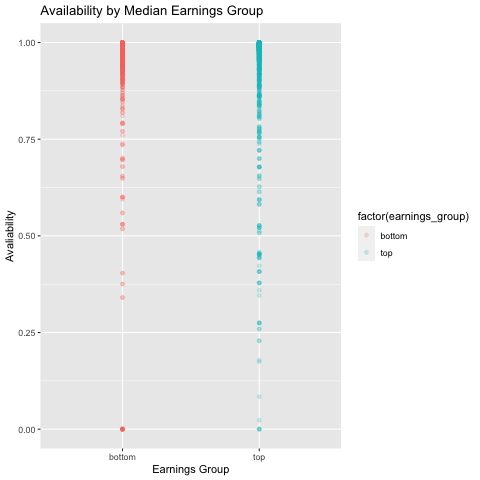

In [7]:
%%R
# do a t-test between top 25% and bottom 25% of median earnings

# mutate a new column where if med_earn_estimate is in the top 25% label as 'top' and bottom 25% as 'bottom', else 'none'
df <- df %>% 
  filter(!is.na(med_earn_estimate)) %>%
  mutate(earnings_group = if_else(med_earn_estimate >= quantile(med_earn_estimate, 0.75), 'top', 
                                  if_else(med_earn_estimate <= quantile(med_earn_estimate, 0.25), 'bottom', NA)))

# print t-test result
result <- t.test(availability ~ earnings_group, data = df)
print(result)

# ggplot botton25 and top25
df %>% 
# remove NAs in earnings_group
  filter(!is.na(earnings_group)) %>%
  ggplot(aes(x = factor(earnings_group), y = availability, color=factor(earnings_group))) +
  geom_point(alpha=.2) +
  labs(title = 'Availability by Median Earnings Group', x = 'Earnings Group', y = 'Avaliability') 

In [8]:
%%R
df$sub_pop_estimate %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     20     466     808    1067    1636    2990 


In [9]:
%%R
df$availability %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.9706  0.9861  0.9521  0.9927  1.0000      85 



	Welch Two Sample t-test

data:  availability by ridership
t = -4.1213, df = 2886.9, p-value = 3.873e-05
alternative hypothesis: true difference in means between group bottom and group top is not equal to 0
95 percent confidence interval:
 -0.03505056 -0.01245091
sample estimates:
mean in group bottom    mean in group top 
           0.9218560            0.9456067 



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 54 rows containing missing values (`geom_point()`). 



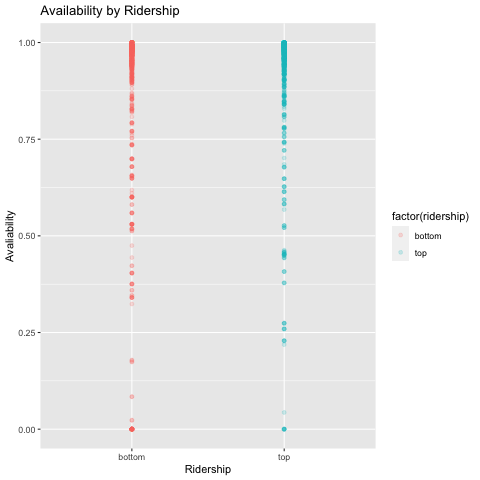

In [10]:
%%R

df <- df %>% 
  filter(!is.na(sub_pop_estimate)) %>%
  mutate(ridership = if_else(sub_pop_estimate >= quantile(sub_pop_estimate, 0.75), 'top', 
                                  if_else(sub_pop_estimate <= quantile(sub_pop_estimate, 0.25), 'bottom', NA)))

# print t-test result
result <- t.test(availability ~ ridership, data = df)
print(result)

# ggplot botton25 and top25
df %>% 
  filter(!is.na(ridership)) %>%
  ggplot(aes(x = factor(ridership), y = availability, color=factor(ridership))) +
  geom_point(alpha=.2) +
  labs(title = 'Availability by Ridership', x = 'Ridership', y = 'Avaliability') 


	One Sample t-test

data:  table(df$availability, df$Structure)
t = 11.066, df = 11554, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.4656644 0.6661400
sample estimates:
mean of x 
0.5659022 



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 85 rows containing missing values (`geom_point()`). 



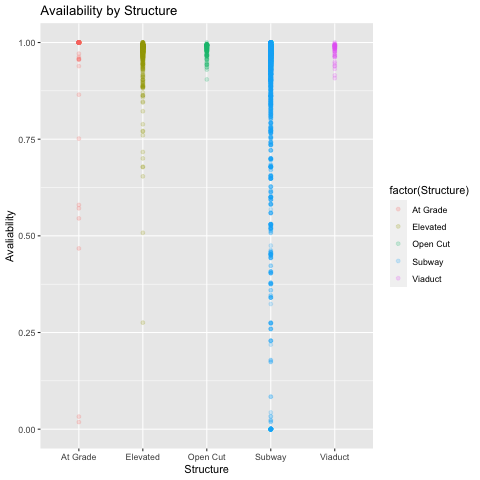

In [11]:
%%R

# t test between availabilty and structure
result <- t.test(table(df$availability, df$Structure))
print(result)

df %>% 
  ggplot(aes(x = factor(Structure), y = availability, color=factor(Structure))) +
  geom_point(alpha=.2) +
  labs(title = 'Availability by Structure', x = 'Structure', y = 'Avaliability') 


In [12]:
%%R

df$total_outages %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   2.864   4.000  25.000 


In [13]:
%%R

# chi square test between ridership and total outages
df <- df %>%
  filter(!is.na(total_outages)) %>%
  mutate(frequent_outage = if_else(total_outages >= quantile(total_outages, 0.75), 'yes', 
                                  if_else(total_outages <= quantile(total_outages, 0.25), 'no', NA)))

print(table(df$ridership, df$frequent_outage))

result <- chisq.test(table(df$ridership, df$frequent_outage))
print(result)



        
          no yes
  bottom 688

 512
  top    758 490

	Pearson's Chi-squared test with Yates' continuity correction

data:  table(df$ridership, df$frequent_outage)
X-squared = 2.7925, df = 1, p-value = 0.0947

